<a href="https://colab.research.google.com/github/ImpulsoGov/Analises-Publicas-Saude/blob/main/Notebooks/20220706_AT_Analise_Desempenho_APS_Perfil_Municipios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise exploratória de Acesso e Território : Desempenho na atenção básica e perfil dos municípios


**O problema:**

Asumimos a hipótese que o desempenho das unidades de saúde possui fatores exógenos - suporte da estrutura de planejamento do município e características territoriais de inserção; e fatores endógenos - práticas e aspectos organizacionais das equipes de saúde. Queremos entender que para além dos fatores exógenos se é possível isolar a influencia das práticas e aspectos organizacionais sobre o desempenho, sobre tudo na qualificação da territorialização das ações de saúde.

**O objetivo:**

O propósito dessa análise e caracterizar o universo de municípios a partir de seu desempenho em indicadores de saúde na atenção primária.
Defineremos os indicadores e estudaremos sua frequência de distribuição a fim de gerar classficações para o universo de municípios em análise.   

**Próximos passos:**

Com a caracterização dos municípios queremos entender se há relevante variação de desempenho entre as unidades de saúde. Assumimos a hipótese de que independete do contexto municipal, há equipes/unidades com bons desempenhos. Se houver casos signifivos dessa discrepância nossa hipótese será provada. A caracterização dos municípios nos fornecerá o perfil do município onde esses casos são mais frequentes. 


**Features de desempenho:**
*   ISF : Dimensão do atendimento
*   Cobertura do Parâmetro : Dimensão da cobertura
*   Cobertura de Denominador : Dimensão da identificação de população alvo/vulnerável

**Features de caracterização:**
*   Porte Populacional : Se há relevância do tamanho da população municipal
*   IDHM : Se há relevância do nível de desenvolvimento humano no município
*   Tipologia : Se há relevância da característica territorial

# Explora o idhm de saúde
# Não há relevância





## **Preparação do ambiente**


In [ ]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/relatorio_acesso_territorio_completo.csv')
df.columns

- Visualizar a distribuição de municipios por desempenho


In [ ]:
# Box plot de cobertura_parametro
fig = px.box(df, y="cobertura_parametro", points="all")
fig.show()
# Histograma de cobertura_parametro
fig = px.histogram(df, x="cobertura_parametro", marginal = 'box') 
fig.show()

# selecionar outliers : ver como são outros indicadores e explorar perfil do município
# hipotese : se são municipios de pop flutuante

In [ ]:
# Box plot de isf
fig = px.box(df, y="isf", points="all")
fig.show()
# Histograma de isf
fig = px.histogram(df, x="isf", marginal = 'box') 
fig.show()

In [ ]:
# Box plot de cobertura_denominador
fig = px.box(df, y="cobertura_denominador", points="all")
fig.show()
# Histograma de cobertura_denominador
fig = px.histogram(df, x="cobertura_denominador", marginal = 'box') 
fig.show()

In [ ]:
# Testando com a remoção de outiliers em cobertura_parametro

def calculaPercentil98(df):

    # Define os percentis para ver como os dados estão distribuídos
    description = df.describe(percentiles=[.25, .5, .75, .9, .95, .98, .99, .999])
    description_dict = description.to_dict()

    # Coleta o valor que delimita 98% das amostras no DataFrame
    data_cut = float(description_dict["cobertura_parametro"]["98%"])

    # Seleciona apenas as amostras dentro do intervalo de 98%, removendo os outliers
    df98 = df[df["cobertura_parametro"] <= data_cut]

    return df98

df98 = calculaPercentil98(df)
fig = px.histogram(df98, x="cobertura_parametro", marginal = 'box') 
fig.show()

In [ ]:
# Testando com a remoção de outiliers em cobertura_denominador

def calculaPercentil98(df):

    # Define os percentis para ver como os dados estão distribuídos
    description = df.describe(percentiles=[.25, .5, .75, .9, .95, .98, .99, .999])
    description_dict = description.to_dict()

    # Coleta o valor que delimita 98% das amostras no DataFrame
    data_cut = float(description_dict["cobertura_denominador"]["98%"])

    # Seleciona apenas as amostras dentro do intervalo de 98%, removendo os outliers
    df98 = df[df["cobertura_denominador"] <= data_cut]

    return df98

df98 = calculaPercentil98(df)
fig = px.histogram(df98, x="cobertura_denominador", marginal = 'box') 
fig.show()

** Antes de descartar os outilers fora do quartil de 98% é preciso interpreta-los. Avançaremos na análise com os dados 

In [ ]:
df = df.loc[:,['idhm_2010', 'estabelecimentos', 'equipes', 'cobertura_denominador', 'cobertura_parametro', 'isf',
       'reunioes_por_equipe']]

df.quantile([.2, .4, .6, .8, .98], axis = 0)

,idhm_2010,estabelecimentos,equipes,cobertura_denominador,cobertura_parametro,isf,reunioes_por_equipe
0.20,0.588,2.00,2.00,0.812660,0.93418,0.2107,0.0000
0.40,0.638,3.00,3.00,0.917183,1.03096,0.2800,0.0000
0.60,0.688,5.00,6.00,1.009089,1.11920,0.3392,0.0000
0.80,0.727,9.00,10.00,1.143651,1.23474,0.4021,0.1111
0.98,0.783,32.62,52.62,2.304406,1.79459,0.5221,1.0000


In [ ]:
# classificando municipios pela distribuição quartil de isf
conditionlist = [
    (df['isf'] <= 0.2107),
    (df['isf'] > 0.2107) & (df['isf'] <= 0.2800),
    (df['isf'] > 0.2800) & (df['isf'] <= 0.3392),
    (df['isf'] > 0.3392) & (df['isf'] <= 0.4021),
    (df['isf'] > 0.4021) & (df['isf'] <= 0.6614)]
choicelist = ['muito baixo', 'baixo', 'médio','alto','muito alto']
df['isf_classificado'] = np.select(conditionlist, choicelist, default='não especificado')

# classificando municipios pela distribuição quartil de cobertura_parametro
conditionlist = [
    (df['isf'] <= 0.93418),
    (df['isf'] > 0.93418) & (df['isf'] <= 1.03096),
    (df['isf'] > 1.03096) & (df['isf'] <= 1.11920),
    (df['isf'] > 1.11920) & (df['isf'] <= 1.23474),
    (df['isf'] > 1.23474) & (df['isf'] <= 1.79459)]
choicelist = ['muito baixo', 'baixo', 'médio','alto','muito alto']
df['cobertura_parametro_classificado'] = np.select(conditionlist, choicelist, default='não especificado')

# classificando municipios pela distribuição quartil de cobertura_denominador
conditionlist = [
    (df['cobertura_denominador'] <= 0.740384) ,
    (df['cobertura_denominador'] <= 0.842468),
    (df['cobertura_denominador'] <= 0.962471),
    (df['cobertura_denominador'] <= 1.102150),
    (df['cobertura_denominador'] <= 2.304406)]
choicelist = ['muito baixo', 'baixo', 'médio','alto','muito alto']
df['cobertura_denominador_classificado'] = np.select(conditionlist, choicelist, default='não especificado')

In [ ]:
# Verificando a distribuição de municipios por classe de isf_classificado
df2 = df.groupby(['isf_classificado'], as_index=False)['municipio_id_sus'].count()
df2.head()

,isf_classificado,municipio_id_sus
0,alto,1114
1,baixo,1121
2,muito alto,1106
3,muito baixo,1115
4,médio,1107


In [ ]:
# Filtrando apenas isf acima da classificação 'alto'
df_isf_alto = df.query("isf_classificado == 'alto' or isf_classificado == 'muito alto'")

# Agrupando quantidade de municipios por tipologia
df_isf_alto = df_isf_alto.groupby(['tipologia'], as_index=False)['municipio_id_sus'].nunique()

fig = px.bar(df_isf_alto, x='tipologia', y='municipio_id_sus')
fig.update_layout(title=("Quantidade de municípios com ISF alto por tipologia territorial"))
fig.show()


# Ver a porcentagem de municipios de rural adjacente com alto desempenho em relação ao universo de municipios de rural adjacente 

In [ ]:
# Filtrando apenas isf acima da classificação 'alto'
df_isf_alto = df.query("isf_classificado == 'alto' or isf_classificado == 'muito alto'")

# Agrupando quantidade de municipios por porte_populacional
df_isf_alto = df_isf_alto.groupby(['porte_populacional'], as_index=False)['municipio_id_sus'].nunique()

fig = px.bar(df_isf_alto, x='porte_populacional', y='municipio_id_sus')
fig.update_layout(title=("Quantidade de municípios com ISF alto por porte populacional"))
fig.show()

In [ ]:
# Verificando a correlação entre ISF e IDHM

df_isf_alto = df.query("isf_classificado == 'alto' or isf_classificado == 'muito alto'")

# Normalizando variaveis
df_isf_alto['isf_normalizado'] = (df_isf_alto['isf'] - df_isf_alto['isf'].min()) / ( df_isf_alto['isf'].max() - df_isf_alto['isf'].min())
df_isf_alto['idhm_2010_normalizado'] = (df_isf_alto['idhm_2010'] - df_isf_alto['idhm_2010'].min()) / ( df_isf_alto['idhm_2010'].max() - df_isf_alto['idhm_2010'].min())

fig = px.scatter(df_isf_alto, x="isf_normalizado", y="idhm_2010_normalizado") 
fig.show()

# grafico de barras empilhadas 100% : contar municipios nas classes de desemepenho (de cada indicador) por tipologia (em relação ao universo total)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



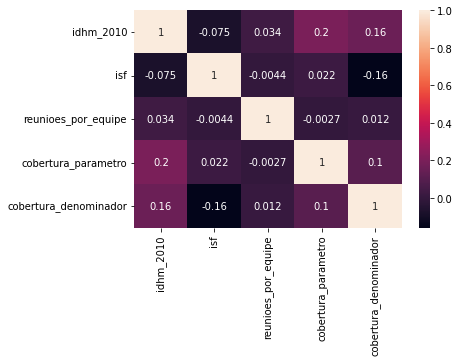

In [ ]:
import seaborn as sns 
df_isf_alto = df.query("isf_classificado == 'alto' or isf_classificado == 'muito alto'")
df = df_isf_alto.loc[:,['idhm_2010','isf','reunioes_por_equipe','cobertura_parametro','cobertura_denominador']]

ax = sns.heatmap(df.corr(), annot=True)

# tentar fazer correlação exluindo outliers em cobertura do parametro e cobertura do denominado 